In [2]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [5]:
from sklearn.datasets import load_breast_cancer 
data = load_breast_cancer()

In [6]:
type(data)

sklearn.utils.Bunch

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
data.data.shape

(569, 30)

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.target.shape

(569,)

In [12]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [19]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
scalers = StandardScaler()
X_train = scalers.fit_transform(X_train)
X_test = scalers.fit_transform(X_test)
N, D = X_train.shape 

In [35]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10,input_shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy']
)
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 10ms/step - loss: 0.4834 - accuracy: 0.7664 - val_loss: 0.3835 - val_accuracy: 0.8777
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3893 - accuracy: 0.8504 - val_loss: 0.3120 - val_accuracy: 0.8989
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3310 - accuracy: 0.8766 - val_loss: 0.2638 - val_accuracy: 0.9202
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2907 - accuracy: 0.9003 - val_loss: 0.2296 - val_accuracy: 0.9309
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2604 - accuracy: 0.9055 - val_loss: 0.2045 - val_accuracy: 0.9521
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2357 - accuracy: 0.9081 - val_loss: 0.1841 - val_accuracy: 0.9628
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2167 - accuracy: 0.9108 - val_loss: 0.1672 - val_accuracy: 0.9681
Epoch 8/100


In [36]:
print('Train eval : ',model.evaluate(X_train, y_train))
print('Test eval : ',model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 946us/step - loss: 0.0564 - accuracy: 0.9869
Train eval :  [0.05644482001662254, 0.9868766665458679]
6/6 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9787
Test eval :  [0.05362893268465996, 0.978723406791687]


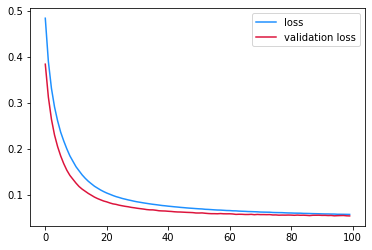

In [45]:
from cProfile import label
import matplotlib.pyplot as plt 
plt.plot(r.history['loss'], c='dodgerblue', label='loss')
plt.plot(r.history['val_loss'], c='crimson', label='validation loss')
plt.legend();

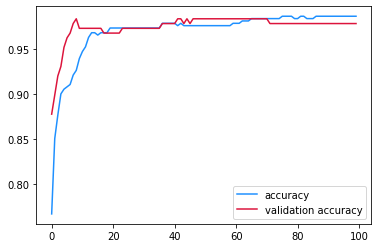

In [51]:
plt.plot(r.history['accuracy'], c='dodgerblue', label='accuracy')
plt.plot(r.history['val_accuracy'], c='crimson', label='validation accuracy')
plt.legend();
